# Condicionales

**if - else**  
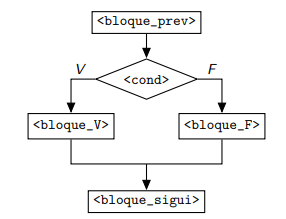

In [4]:
edad = int(input("¿Cuántos tiene?"))

if edad >= 18:
    print("Bienvenido al Bar")
else:
    print("Chao!")

¿Cuántos tiene?10
Chao!


In [7]:
def valor_absoluto(n):
    if n >= 0:
        valor = n
    else: 
        valor = -n

    return valor

valor_absoluto(-12)

12

**enlazado (elif)**  
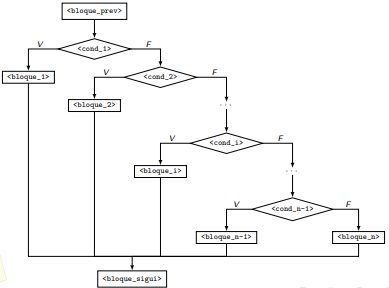

In [10]:
edad = int(input("Edad: "))

if edad >= 18 and edad < 25:
    print("Bienvenido, entra gratis")
elif edad > 25:
    print("Bienvenido, son 25.000 pesos")
else: 
    print("Bye")

Edad: 10
Bye


Una tienda tiene las siguientes promociones

>Si un cliente lleva más de 5 productos del mismo tipo le realizan un descuento del 5%. Si lleva más de 10 productos del
mismo tipo le realizan un descuento del 10%. Si lleva más de 20
productos del mismo tipo le realizan un descuento del 20%.
Construya un programa que dado el número de productos y el
precio de cada producto determine el valor a pagar por el cliente.


In [18]:
def pago_final(n, precio):
    
    if precio >= 0:
        if n <= 5:
            valor = n * precio
        elif n > 5 and n <= 10:
            valor = n * precio * 0.95
        elif n > 10 and n <= 20:
            valor = n * precio * 0.9
        else:
            valor = n * precio * 0.8
        
        return valor
    else:
        print("Positivo")
    

pago_final(21,10000)

168000.0

## Estructuras cíclicas


**while (mientras)** 

Se ejecuta mientras la expresión booleana se cumpla (True). 

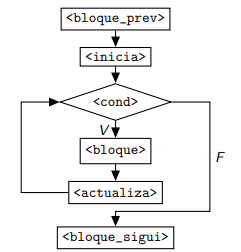

In [19]:
i = 0
while(i<7):
    print(i)
    i += 1 

0
1
2
3
4
5
6


In [25]:
i = 20 # Inicializamos en 2
j = 100 # Inicializamos en 25
while i < j:
    print(i , j, sep =", ")
    i *= 2
    j += 10 
print("The end")
print(i, j, sep= ", ")

20, 100
40, 110
80, 120
The end
160, 130


In [27]:
# Uso de banderas #

suma = 0
bandera = True # Verde

print("Bienvenido a la carrera de Python")
print("Nota: incerte 0 si hubo un accidente")

while(bandera):
    x = int(input("Vueltas restantes:"))
    if x == 0:
        bandera = False
    else: 
        print("Los carros están corrindo")
        print("°_°")
        
print(suma)

Bienvenido a la carrera de Python
Nota: incerte 0 si hubo un accidente
Vueltas restantes:5
Los carros están corrindo
°_°
Vueltas restantes:2
Los carros están corrindo
°_°
Vueltas restantes:0
0


**for (para)**  
Para iterar sobre los elementos de una colección de elementos.

In [28]:
frutas = ["Tomate de árbol", "Maracuyá ", "Guayaba"]
for fruta in frutas:
    print(fruta)

Tomate de árbol
Maracuyá 
Guayaba


In [31]:
edades_2021 = [14,15,16,17]
for edad in edades_2021:
    edad += 10
    print(edad)

24
25
26
27


In [35]:
# Range(C,F,I)
for elemento in range(10,1,-2):
    print(elemento)

10
8
6
4
2


# MCO

In [36]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 

In [37]:
datos= pd.read_csv(r"C:\Users\fcecursos\Downloads\Econometria-en-Python-main\Econometria-en-Python-main\Bases de datos\GujaratiPorter71.txt", sep="\t")

In [38]:
datos.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


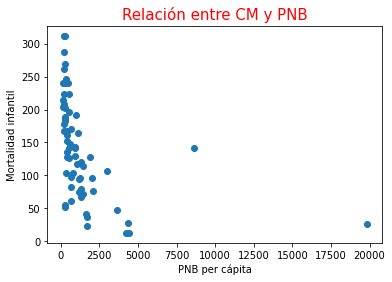

In [40]:
fig, ax = plt.subplots()
ax.scatter(datos["PGNP"],datos["CM"])
ax.set_xlabel("PNB per cápita")
ax.set_ylabel("Mortalidad infantil")
ax.set_title("Relación entre CM y PNB", fontsize = 15, color = "red")
plt.show()

In [42]:
modelo=sm.OLS(datos["CM"],datos["PGNP"])
resultados = modelo.fit()
print(resultados.summary())

                                 OLS Regression Results                                
Dep. Variable:                     CM   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):              0.041
Method:                 Least Squares   F-statistic:                              3.710
Date:                Thu, 09 Jun 2022   Prob (F-statistic):                      0.0586
Time:                        12:54:31   Log-Likelihood:                         -413.92
No. Observations:                  64   AIC:                                      829.8
Df Residuals:                      63   BIC:                                      832.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [43]:
modelo=sm.OLS(datos["CM"],sm.add_constant(datos["PGNP"]))
resultados = modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           0.000826
Time:                        12:56:44   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.4244      9.846     15.989      0.0

In [44]:
valores_estimados = resultados.predict()

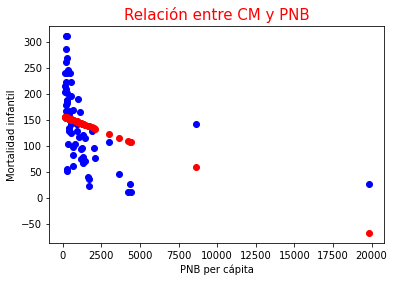

In [45]:
fig, ax = plt.subplots()
ax.scatter(datos["PGNP"],datos["CM"], color = "blue")
ax.scatter(datos["PGNP"],valores_estimados, color = "red")
ax.set_xlabel("PNB per cápita")
ax.set_ylabel("Mortalidad infantil")
ax.set_title("Relación entre CM y PNB", fontsize = 15, color = "red")
plt.show()

In [46]:
datos["1/PGNP"] = 1/datos["PGNP"]
datos.head()

,CM,FLR,PGNP,TFR,1/PGNP
0,128,37,1870,6.66,0.000535
1,204,22,130,6.15,0.007692
2,202,16,310,7.00,0.003226
3,197,65,570,6.25,0.001754
4,96,76,2050,3.81,0.000488


In [47]:
modelo=sm.OLS(datos["CM"],sm.add_constant(datos["1/PGNP"]))
resultados = modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     52.61
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           7.82e-10
Time:                        13:03:05   Log-Likelihood:                -347.79
No. Observations:                  64   AIC:                             699.6
Df Residuals:                      62   BIC:                             703.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.7944     10.832      7.551      0.0

In [48]:
valores_estimados = resultados.predict()

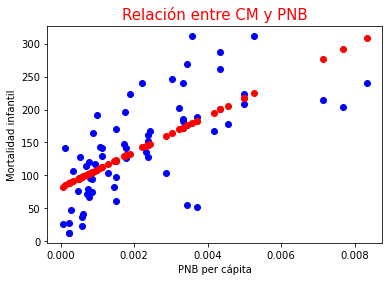

In [50]:
fig, ax = plt.subplots()
ax.scatter(datos["1/PGNP"],datos["CM"], color = "blue")
ax.scatter(datos["1/PGNP"],valores_estimados, color = "red")
ax.set_xlabel("PNB per cápita")
ax.set_ylabel("Mortalidad infantil")
ax.set_title("Relación entre CM y PNB", fontsize = 15, color = "red")
plt.show()

In [51]:
datos.head()

,CM,FLR,PGNP,TFR,1/PGNP
0,128,37,1870,6.66,0.000535
1,204,22,130,6.15,0.007692
2,202,16,310,7.00,0.003226
3,197,65,570,6.25,0.001754
4,96,76,2050,3.81,0.000488


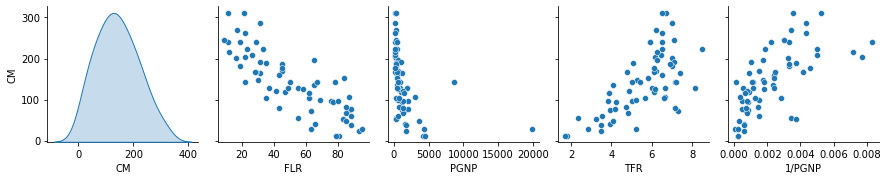

In [53]:
sns.pairplot(datos, y_vars="CM", diag_kind="kde")

In [54]:
Y = datos["CM"] 
X = datos[["1/PGNP","FLR"]]

In [55]:
modelo=sm.OLS(Y,sm.add_constant(X))
resultados = modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     75.63
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           3.04e-17
Time:                        13:07:59   Log-Likelihood:                -327.55
No. Observations:                  64   AIC:                             661.1
Df Residuals:                      61   BIC:                             667.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        215.0297     19.828     10.845      0.0

In [56]:
valores_estimados = resultados.predict()

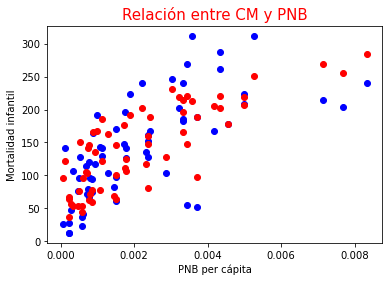

In [57]:
fig, ax = plt.subplots()
ax.scatter(datos["1/PGNP"],datos["CM"], color = "blue")
ax.scatter(datos["1/PGNP"],valores_estimados, color = "red")
ax.set_xlabel("PNB per cápita")
ax.set_ylabel("Mortalidad infantil")
ax.set_title("Relación entre CM y PNB", fontsize = 15, color = "red")
plt.show()